# Estudio de mercado de videojuego
### Sergio Castro Rodríguez

Vamos a realizar un análisis descriptivo de un dataset sobre los videojuegos más vendidos. El análisis lo vamso a realizar simulando obtener informaciòn para lanzar un video juego. Para esto necesitamos conocer los géneros más vendidos, las zonas geográficas que más compran y la plataforma en la que se lanzará.  
(Suponemos que todas las plataformas están aún activas).

Para este análisis tenemos los siguientes datos:

Rank: Posición en el ranking de los videojuegos más vendidos.
Platform: Plataforma a la que pertenece el juego.
Year: Año de publicación.
Genre: Género del juego.
Publisher: Empresa que comercializa el juego.
NA_Sales: Ventas del juego en América del norte (en millones).
EU_Sales: Ventas del juego en Europa (en millones).
JP_Sales: Ventas del juego en Japon (en millones).
Other_Sales: Ventas del juego en el resto del mundo (en millones).
Global_Sales: Ventas totales del juego (en millones).

Además he creado otro CSV con las diferentes plataformas:
Platform: Plataforma.
Full_Name:Nombre completo de la plataforma.
Company: Empresa a la que pertenece la plataforma.

Cargamos las librerías que vamos a utilizar

In [659]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Y cargamos los datos del csv en un dataFrame de pandas

In [660]:
datos = pd.read_csv("data/vgsales.csv")
datos.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [661]:
plataforma = pd.read_csv("data/platform.csv")
plataforma.head(5)

,Platform,Full_Name,Company
0,2600,Atari 2600,Atari
1,3DO,3DO Interactive Multiplayer,3DO
2,3DS,Nintendo 3DS,Nintendo
3,DC,DreamCast,Sega
4,DS,Nintendo DS,Nintendo


In [662]:
datos.shape

(16598, 11)

El fichero original tiene 11 columnas (variables) y 16598 registros.  
Vamos a limpiar el ficheros de datos erroneos y ausentes.

In [663]:
datos=datos[datos['Year']<=2016]
datos=datos[datos['Publisher']!='Unknown']
datos=datos.dropna()
datos.shape

(16187, 11)

Mostamos un resumen básico de los datos, para hacernos una idea del dataset

In [664]:
datos.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16187.000000,16187.000000,16187.000000,16187.000000,16187.000000,16187.000000,16187.000000
mean,8265.347254,2006.380923,0.266993,0.148451,0.079131,0.048675,0.543522
std,4786.992191,5.831001,0.824835,0.510773,0.312723,0.190646,1.571897
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4114.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8259.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12401.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Mostramos el conteo de videojuegos por plataforma.Mostramos los las 10 plataformas con más juegos en el ranking

In [665]:
aux=datos.groupby('Platform').sum()
aux2=aux[aux['Global_Sales']<100].sort_values('Global_Sales')
aux3=list(aux2.index)
aux3

['PCFX',
 'GG',
 '3DO',
 'TG16',
 'WS',
 'NG',
 'SCD',
 'DC',
 'GEN',
 'SAT',
 'PSV',
 'WiiU',
 '2600']

Vamos a eliminar las consolas que han vendido menos de 100 millones de copias

In [666]:
dt=datos[~datos['Platform'].isin(aux3)]
dt.pop('Rank')
dt.pop('Year')
dt.pop('Publisher')
dt.head(10)

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,Platform,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,Misc,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,Platform,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,Shooter,26.93,0.63,0.28,0.47,28.31


In [667]:
dt.shape

(15244, 8)

Ya tenemos en el dataframe dt los datos de los videosjuegos cuyas consolas han vendido más de 100 millones de copias dentro del ranking. Ahora me interesa estudiar qué tio de videojuego (género) en que plataforma lanzarlo. Vamos las copias vendidas según estas variables, tanto en global como por zonas geográficas.

In [668]:
dt_gr_GenPlat=dt.groupby(['Genre','Platform']).sum()
dt_gr_Gen=dt.groupby('Genre').sum()
dt_gr_Plat=dt.groupby('Platform').sum()

In [669]:
dt_gr_GenPlat

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre     Platform                                                         
Action    3DS          19.16     12.20     21.94         2.78         56.19
          DS           65.49     26.70     12.70         9.04        114.09
          GB            4.07      2.11      1.49         0.26          7.92
          GBA          35.57     14.11      2.20         1.31         53.33
          GC           25.66      7.65      2.83         0.97         37.25
          N64          18.85      6.32      3.67         0.56         29.44
          NES          16.31      3.34      8.65         0.45         28.75
          PC            9.74     17.18      0.00         3.44         30.49
          PS           62.15     44.63     11.46         7.46        125.74
          PS2         127.71     71.34     25.72        47.61        272.43
          PS3         119.82    109.26     28.95        46.00        304.02
          PS4          29.70     38.19      5.41        13.78         87.06
          PSP          22.99     16.95     11.33        10.67         61.87
          SNES          4.09      1.33      4.46         0.20         10.08
          Wii          65.48     30.54      4.70         9.53        110.32
          X360        139.62     75.85      2.75        21.36        239.65
          XB           33.19     12.21      0.33         1.71         47.46
          XOne         19.45     11.47      0.05         2.81         33.79
Adventure 3DS           1.02      0.80      2.70         0.18          4.69
          DS           25.26     10.39      7.68         3.42         46.75
          GB            8.88      3.50      4.25         0.52         17.16
          GBA           6.93      3.29      1.57         0.26         12.10
          GC            3.82      1.26      0.67         0.18          5.93
          N64           0.23      0.05      0.17         0.00          0.45
          NES           2.19      0.50      1.61         0.08          4.38
          PC            1.75      7.63      0.00         0.63         10.06
          PS            8.42      7.66      3.41         1.24         20.77
          PS2           6.71      5.09      7.43         2.01         21.16
          PS3           8.61      8.13      2.56         3.32         22.64
          PS4           1.42      2.19      0.38         0.71          4.70
...                      ...       ...       ...          ...           ...
Sports    N64          22.07      5.43      4.38         0.67         32.60
          NES           7.00      2.12     17.43         0.29         26.85
          PC            0.34     10.05      0.00         1.58         12.01
          PS           63.21     31.20     18.43         6.65        119.51
          PS2         127.51     66.52     24.69        43.06        261.75
          PS3          60.42     47.65      7.90        19.05        134.91
          PS4          18.18     22.86      0.92         8.06         49.99
          PSP          16.55     11.49      6.10         5.81         39.90
          SNES          2.10      0.29     15.41         0.06         17.87
          Wii         149.87     94.86     18.25        26.90        289.86
          X360         88.44     37.16      0.40        11.33        137.43
          XB           39.97     10.78      0.16         1.98         53.05
          XOne         14.24      7.67      0.02         2.03         23.94
Strategy  3DS           0.78      0.35      0.83         0.11          2.09
          DS            8.47      2.39      2.83         0.99         14.73
          GB            1.49      0.73      5.73         0.11          8.05
          GBA           4.21      1.31      1.78         0.16          7.45
          GC            2.23      0.62      1.33         0.10          4.32
          N64           4.64      1.70      3.68         0.32         10.33
          PC           19.37     22.02      0.00         3.95       

In [670]:
dt_gr_Gen

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,819.05,501.38,148.64,179.94,1649.88
Adventure,99.74,62.67,43.22,16.14,222.01
Fighting,210.95,96.25,74.07,34.81,416.06
Misc,385.98,206.08,100.62,72.23,765.47
Platform,409.63,187.82,124.70,48.55,771.01
Puzzle,108.29,49.07,55.33,12.18,225.43
Racing,348.99,230.61,51.44,75.11,706.39
Role-Playing,321.53,184.85,334.60,57.90,898.95
Shooter,549.39,305.64,31.97,100.28,987.77


In [671]:
dt_gr_Plat

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
3DS,77.88,58.16,97.15,12.53,245.81
DS,387.75,193.70,174.77,60.22,817.44
GB,113.64,47.51,85.12,8.16,254.42
GBA,177.51,72.14,46.50,7.49,304.29
GC,131.88,38.30,21.32,5.13,197.04
N64,138.91,41.03,33.76,4.31,218.21
NES,125.94,21.15,98.65,5.31,251.07
PC,91.48,136.68,0.17,24.18,253.30
PS,334.17,212.02,139.78,40.63,726.42


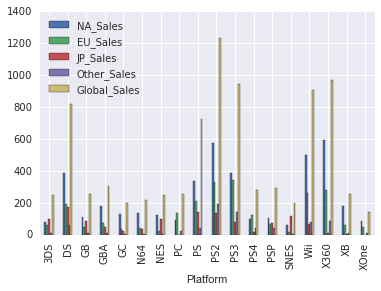

In [672]:
dt_gr_Plat.plot( kind="bar")

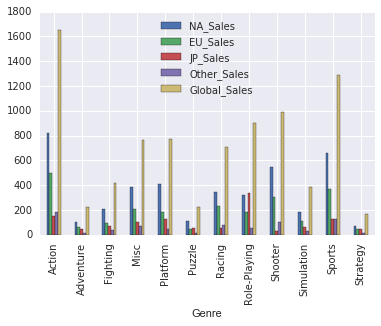

In [673]:
dt_gr_Gen.plot( kind="bar")

A la vista de las tablas agrupadas y de los histogramas podemos decir que las consolas más restables para lanzar el videouego son PS2, PS3, X360, Wii y DS. En cuanto al género de video juego, destacan mucho los de acción, seguido por los de deportes. Después vienen géneros como los shooters, Rol, Plataformas, misc y de carreras. 
Por lo tanto nos quedamos con estas categorías para seguir el análisis.

In [674]:
plataformas=['PS2','PS3','X360','Wii','DS']
generos=['Action','Sports', 'Shooter','Role-Playing','Platform', 'Misc','Racing']
dt=dt[dt['Platform'].isin(plataformas)]
dt=dt[dt['Genre'].isin(generos)]
dt.head(10)

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
6,New Super Mario Bros.,DS,Platform,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,Misc,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,Platform,14.59,7.06,4.70,2.26,28.62
11,Mario Kart DS,DS,Racing,9.81,7.57,4.13,1.92,23.42
13,Wii Fit,Wii,Sports,8.94,8.03,3.60,2.15,22.72
14,Wii Fit Plus,Wii,Sports,9.09,8.59,2.53,1.79,22.00
15,Kinect Adventures!,X360,Misc,14.97,4.94,0.24,1.67,21.82


In [675]:
dt_gr_GenPlat=dt.groupby(['Genre','Platform']).sum()
dt_gr_Gen=dt.groupby('Genre').sum()
dt_gr_Plat=dt.groupby('Platform').sum()

Ahora que tenemos más acotado el mercado objetivo, nos interesa saber cómo se distribuyen en cada plataforma los géneros que hemos seleccionado. Vamos a ver la proporción de cada género en cada plataforma.

In [676]:
counts = pd.DataFrame(columns=['plataforma', 'genero', 'cantidad'])
i=0
for p in plataformas:
    for g in generos:
        aux=dt[dt['Platform']==p]
        aux= aux[aux['Genre']==g]
        cuenta = aux['Name'].size
        counts.loc[i]=[p,g,cuenta]
        i=i+1       
        
counts   

,plataforma,genero,cantidad
0,PS2,Action,345.0
1,PS2,Sports,390.0
2,PS2,Shooter,158.0
3,PS2,Role-Playing,183.0
4,PS2,Platform,101.0
5,PS2,Misc,218.0
6,PS2,Racing,211.0
7,PS3,Action,373.0
8,PS3,Sports,210.0
9,PS3,Shooter,154.0


In [677]:
counts_PS2= counts.copy(deep=True)
counts_PS2=counts_PS2[counts_PS2['plataforma']=='PS2']
counts_PS2.pop('plataforma')

counts_PS3= counts.copy(deep=True)
counts_PS3=counts_PS3[counts_PS3['plataforma']=='PS3']
counts_PS3.pop('plataforma')

counts_X360= counts.copy(deep=True)
counts_X360=counts_X360[counts_X360['plataforma']=='X360']
counts_X360.pop('plataforma')

counts_Wii= counts.copy(deep=True)
counts_Wii=counts_Wii[counts_Wii['plataforma']=='Wii']
counts_Wii.pop('plataforma')

counts_DS= counts.copy(deep=True)
counts_DS=counts_DS[counts_DS['plataforma']=='DS']
counts_DS.pop('plataforma')
counts_DS

,genero,cantidad
28,Action,334.0
29,Sports,146.0
30,Shooter,42.0
31,Role-Playing,193.0
32,Platform,88.0
33,Misc,385.0
34,Racing,66.0


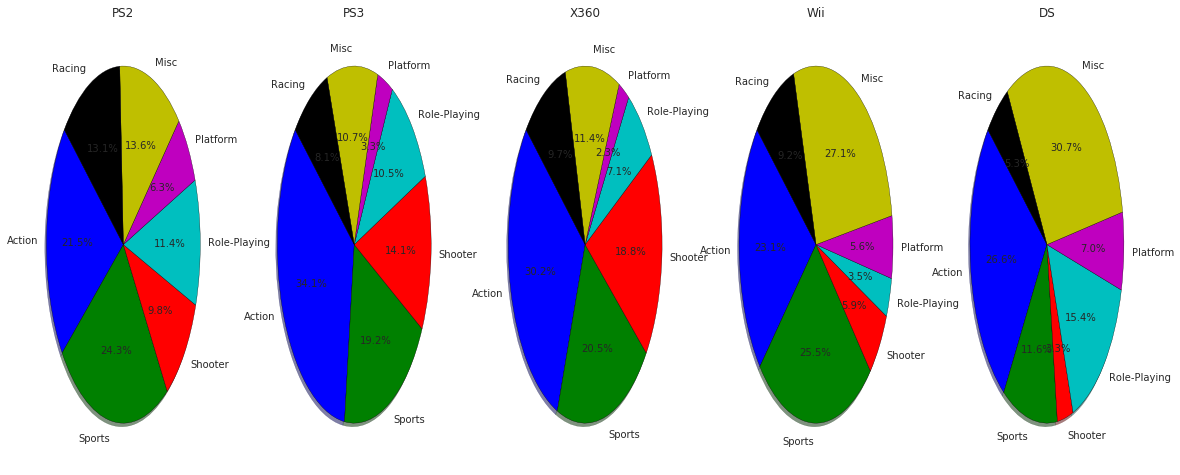

In [678]:
plt.figure(figsize=(20,8))  # Creates a figure, this is done by default, you can omit it.
#PS2
plt.subplot(151)
plt.title('PS2')
plt.pie(counts_PS2['cantidad'], labels=counts_PS2['genero'], colors=('b', 'g', 'r', 'c', 'm', 'y', 'k'),autopct='%1.1f%%', shadow=True, startangle=140 )
#PS3
plt.subplot(152)
plt.title('PS3')
plt.pie(counts_PS3['cantidad'], labels=counts_PS3['genero'], colors=('b', 'g', 'r', 'c', 'm', 'y', 'k'),autopct='%1.1f%%', shadow=True, startangle=140 )
#X360
plt.subplot(153)
plt.title('X360')
plt.pie(counts_X360['cantidad'], labels=counts_X360['genero'], colors=('b', 'g', 'r', 'c', 'm', 'y', 'k'),autopct='%1.1f%%', shadow=True, startangle=140 )
#Wii
plt.subplot(154)
plt.title('Wii')
plt.pie(counts_Wii['cantidad'], labels=counts_Wii['genero'], colors=('b', 'g', 'r', 'c', 'm', 'y', 'k'),autopct='%1.1f%%', shadow=True, startangle=140 )
#DS
plt.subplot(155)
plt.title('DS')
plt.pie(counts_DS['cantidad'], labels=counts_DS['genero'], colors=('b', 'g', 'r', 'c', 'm', 'y', 'k'),autopct='%1.1f%%', shadow=True, startangle=140 )
plt.show()

A la vista de las tablas resumen y de los gràficos observamos que los juegos de acción son los más vendidos para las plataformas PS2, PS3 y X360. En las plataformas Wii y DS no es el tipo de juego más vendido pero su porcentaje está cerca del género más vendido para esas plataformas (Misc).  
Por el contrario, los juegos de tipo Misc, aún siendo los más vendidos para las plataformas DS y Wii, en el resto no tienen unas ventas destacables.  
Por lo tanto, el género del juego que deberíamos lanzar es de acción.  
Vamos a estudiar el comportamiento de los juegos de acción en estas cinco plataformas.

In [679]:
dt=dt[dt['Genre']=='Action']
dt.pop('Genre')
dt.head(10)

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,Grand Theft Auto V,PS3,7.01,9.27,0.97,4.14,21.40
17,Grand Theft Auto: San Andreas,PS2,9.43,0.40,0.41,10.57,20.81
23,Grand Theft Auto V,X360,9.63,5.31,0.06,1.38,16.38
24,Grand Theft Auto: Vice City,PS2,8.41,5.49,0.47,1.78,16.15
38,Grand Theft Auto III,PS2,6.99,4.51,0.30,1.30,13.10
45,Pokemon HeartGold/Pokemon SoulSilver,DS,4.40,2.77,3.96,0.77,11.90
51,Grand Theft Auto IV,X360,6.76,3.10,0.14,1.03,11.02
56,Grand Theft Auto IV,PS3,4.76,3.76,0.44,1.62,10.57
82,FIFA Soccer 13,PS3,1.06,5.05,0.13,2.01,8.24
100,The Legend of Zelda: Twilight Princess,Wii,3.83,2.19,0.60,0.70,7.31


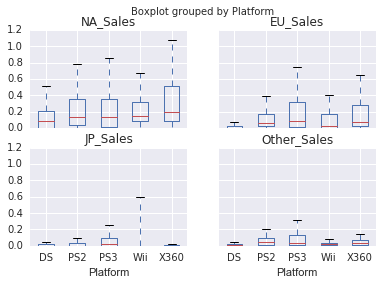

In [680]:
plt.figure();
bp = dt.boxplot(column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], by='Platform',showfliers=False)

Vamos a ver la dispersión en las ventas, por lo que vamos a crear una lista con las ventas globales por plataforma.

In [681]:
GlobalSales_PS2=dt[dt['Platform']=='PS2']['Global_Sales']
GlobalSales_PS3=dt[dt['Platform']=='PS3']['Global_Sales']
GlobalSales_X360=dt[dt['Platform']=='X360']['Global_Sales']
GlobalSales_Wii=dt[dt['Platform']=='Wii']['Global_Sales']
GlobalSales_DS=dt[dt['Platform']=='DS']['Global_Sales']
GlobalSales=[GlobalSales_PS2,GlobalSales_PS3,GlobalSales_X360,GlobalSales_Wii,GlobalSales_DS]

Empezamos por estudiar la PS2.

In [682]:
GlobalSales_PS2.describe()

count    345.000000
mean       0.789652
std        1.769756
min        0.010000
25%        0.130000
50%        0.360000
75%        0.680000
max       20.810000
Name: Global_Sales, dtype: float64

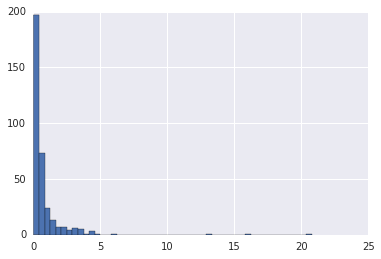

In [683]:
plt.hist(GlobalSales_PS2, bins=50)
plt.show()

In [684]:
GlobalSales_PS3.describe()

count    373.000000
mean       0.815067
std        1.674603
min        0.010000
25%        0.130000
50%        0.320000
75%        0.860000
max       21.400000
Name: Global_Sales, dtype: float64

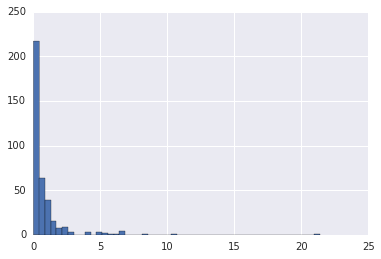

In [685]:
plt.hist(GlobalSales_PS3, bins=50)
plt.show()

In [686]:
GlobalSales_X360.describe()

count    317.000000
mean       0.755994
std        1.420520
min        0.010000
25%        0.150000
50%        0.300000
75%        0.800000
max       16.380000
Name: Global_Sales, dtype: float64

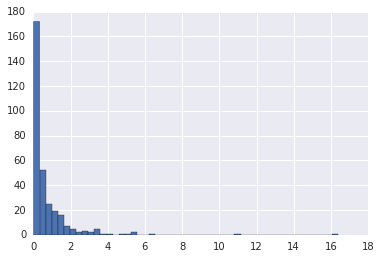

In [687]:
plt.hist(GlobalSales_X360, bins=50)
plt.show()

In [688]:
GlobalSales_Wii.describe()

count    229.000000
mean       0.481747
std        0.792985
min        0.010000
25%        0.110000
50%        0.230000
75%        0.530000
max        7.310000
Name: Global_Sales, dtype: float64

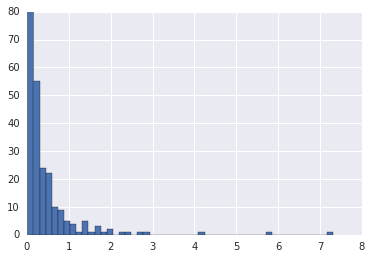

In [689]:
plt.hist(GlobalSales_Wii, bins=50)
plt.show()

In [690]:
GlobalSales_DS.describe()

count    334.000000
mean       0.341587
std        0.860350
min        0.010000
25%        0.050000
50%        0.120000
75%        0.317500
max       11.900000
Name: Global_Sales, dtype: float64

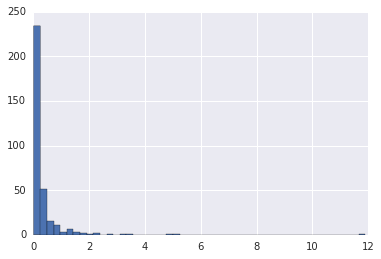

In [691]:
plt.hist(GlobalSales_DS, bins=50)
plt.show()

Analizando los estadísticos y lo gráficos de las diferentes plataformas, vemos que la PS3 es la que tiene una media de ventas superior (0,815), con una desviación de 1,67. Por el contrario la plataforma Wii es la que menos varianza tiene (0,79) con una media de 0,48.  
Los datos nos llevan a pensar que será más rentable apostar por un juego de acción para PS3, aunque la alta variabilidad de las ventas no nos ayuden a preveer la cantidad aproximada de copias vendidas.  
Ahora veremos las ventas de los juegos de accion para PS3 en las distintas zonas geográficas.  

In [692]:
dt.head()
dt_accion_PS3=dt[dt['Platform']=='PS3']
dt_accion_PS3.pop('Platform')
dt_accion_PS3.set_index('Name')
dt_accion_PS3.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,Grand Theft Auto V,7.01,9.27,0.97,4.14,21.40
56,Grand Theft Auto IV,4.76,3.76,0.44,1.62,10.57
82,FIFA Soccer 13,1.06,5.05,0.13,2.01,8.24
115,Uncharted 3: Drake's Deception,2.77,2.80,0.19,1.06,6.83
119,Uncharted 2: Among Thieves,3.27,2.25,0.21,1.00,6.73


In [693]:
dt_accion_PS3.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.321233,0.292922,0.077614,0.123324,0.815067
std,0.660060,0.699713,0.144395,0.301453,1.674603
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.010000,0.010000,0.000000,0.010000,0.130000
50%,0.130000,0.080000,0.020000,0.040000,0.320000
75%,0.350000,0.320000,0.100000,0.130000,0.860000
max,7.010000,9.270000,1.080000,4.140000,21.400000


C:\Users\Sergio_2\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x6b47e7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x6b46e518>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x6b464048>,
 'whiskers': [<matplotlib.lines.Line2D at 0x6b47e978>,
  <matplotlib.lines.Line2D at 0x682504e0>]}

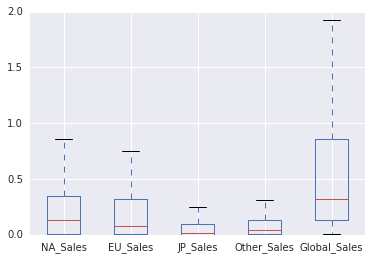

In [694]:
dt_accion_PS3.boxplot(showfliers=False)

En el gráfico de boxplot, en el que hemos eliminado los outliers para que no desvirtuen el análisis, vemos que las dos zonas con mayor consumos de videojuegos de accion para PS3 son Norteamérica y Europa.

La conclusión es que debemos apostar por un videojuego de acción para la PS3 y nos deberíamos de centrar en las zonas de Norteamérica y Europa, puesto que son los mayores consumidores de juegos con estas características.

Ahora vamos a ver como se comporta la competencia en n juego con estas características.

In [695]:
comp=datos[datos['Platform']=='PS3']
comp=comp[comp['Genre']=='Action']
comp.pop('Year')
comp['Rank']=1 # cambiamos el valor de Rank para utilizarlo como un contador en la suma
compYear=comp.groupby('Publisher').sum()
promedioNA=compYear['NA_Sales']/compYear['Rank']
promedioEU=compYear['EU_Sales']/compYear['Rank']
promedioJP=compYear['JP_Sales']/compYear['Rank']
promedioOTR=compYear['Other_Sales']/compYear['Rank']
promedioGLB=compYear['Global_Sales']/compYear['Rank']

compYear['PromedioNA']=promedioNA
compYear['PromedioEU']=promedioEU
compYear['PromedioJP']=promedioJP
compYear['PromedioOTR']=promedioOTR
compYear['PromedioGLB']=promedioGLB
compYear.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PromedioNA,PromedioEU,PromedioJP,PromedioOTR,PromedioGLB
Publisher,,,,,,,,,,,
505 Games,3,0.25,0.47,0.09,0.15,0.96,0.083333,0.156667,0.030000,0.050000,0.320000
Abylight,1,0.07,0.00,0.00,0.01,0.08,0.070000,0.000000,0.000000,0.010000,0.080000
Ackkstudios,1,0.00,0.00,0.33,0.00,0.33,0.000000,0.000000,0.330000,0.000000,0.330000
Activision,36,7.40,5.90,0.06,2.48,15.82,0.205556,0.163889,0.001667,0.068889,0.439444
Arc System Works,1,0.00,0.00,0.02,0.00,0.02,0.000000,0.000000,0.020000,0.000000,0.020000


In [696]:
promedios=compYear[['PromedioNA','PromedioEU','PromedioJP','PromedioOTR']]
promedios.head()

,PromedioNA,PromedioEU,PromedioJP,PromedioOTR
Publisher,,,,
505 Games,0.083333,0.156667,0.030000,0.050000
Abylight,0.070000,0.000000,0.000000,0.010000
Ackkstudios,0.000000,0.000000,0.330000,0.000000
Activision,0.205556,0.163889,0.001667,0.068889
Arc System Works,0.000000,0.000000,0.020000,0.000000


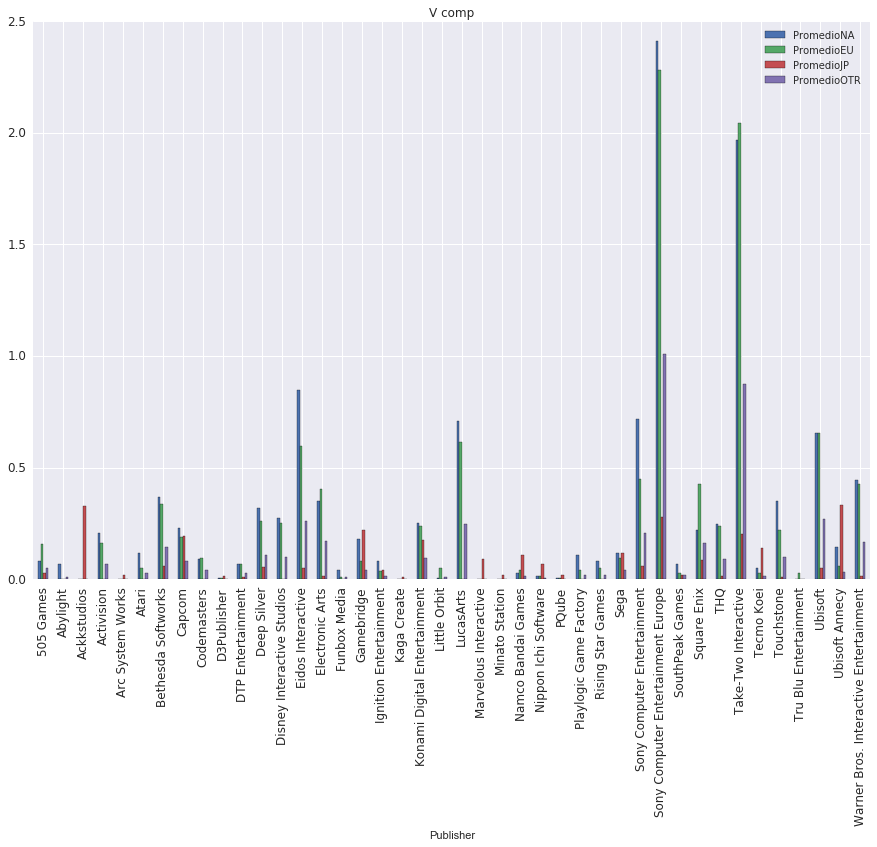

In [697]:
ax = promedios.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)

Nuestro gran competidor sería Sony, seguido de Take-Two interactive, que son líderes destacados tanto en Norteamérica como en Europa. El mercado japonés se comporta de diferente manera y los líderes son Ackkstudios y Ubisoft, aunque Sony y Take Two están cerca de ellos.